In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Constructing the DataFrame**

In [2]:
import pandas as pd
import os
import zipfile

# 1. Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/Capstone/Project_A.zip', 'r') as zip_ref:
    zip_ref.extractall('pp1')

# 2. Reading the Directory Structure
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/Project_A'):
    for file in files:
        # Assuming images are .jpg (modify this if there are other formats)
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# 3. Constructing the DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

#print(df.head())
df

image_path      label
0              pp1/Project_A/paper/paper745.jpg      paper
1              pp1/Project_A/paper/paper531.jpg      paper
2              pp1/Project_A/paper/paper626.jpg      paper
3              pp1/Project_A/paper/paper836.jpg      paper
4               pp1/Project_A/paper/paper52.jpg      paper
...                                         ...        ...
15510  pp1/Project_A/cardboard/cardboard192.jpg  cardboard
15511  pp1/Project_A/cardboard/cardboard290.jpg  cardboard
15512  pp1/Project_A/cardboard/cardboard592.jpg  cardboard
15513  pp1/Project_A/cardboard/cardboard665.jpg  cardboard
15514  pp1/Project_A/cardboard/cardboard439.jpg  cardboard

[15515 rows x 2 columns]

**Count of each type of garbage**

In [3]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Garbage Type', 'Counts']

# Create a bar chart using Plotly Express
fig = px.bar(df_counts,
              x='Garbage Type',
              y='Counts',
              title='No. of Counts for Each Type of Garbage',
              labels={'Garbage Type': 'Type of Garbage', 'Counts': 'Counts'},
              color='Garbage Type',
              category_orders={"Garbage Type": df_counts['Garbage Type'].tolist()},
              text='Counts',  # Add count labels on top of the bars
              color_discrete_sequence=px.colors.qualitative.Dark2)  # Set color scheme

 # Customize the layout
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_xaxes(title_text=None)  # Remove x-axis label
fig.update_yaxes(title_text=None)  # Remove y-axis label

 # Show the plot
fig.show('')

**Collecting Some Random Image Data**

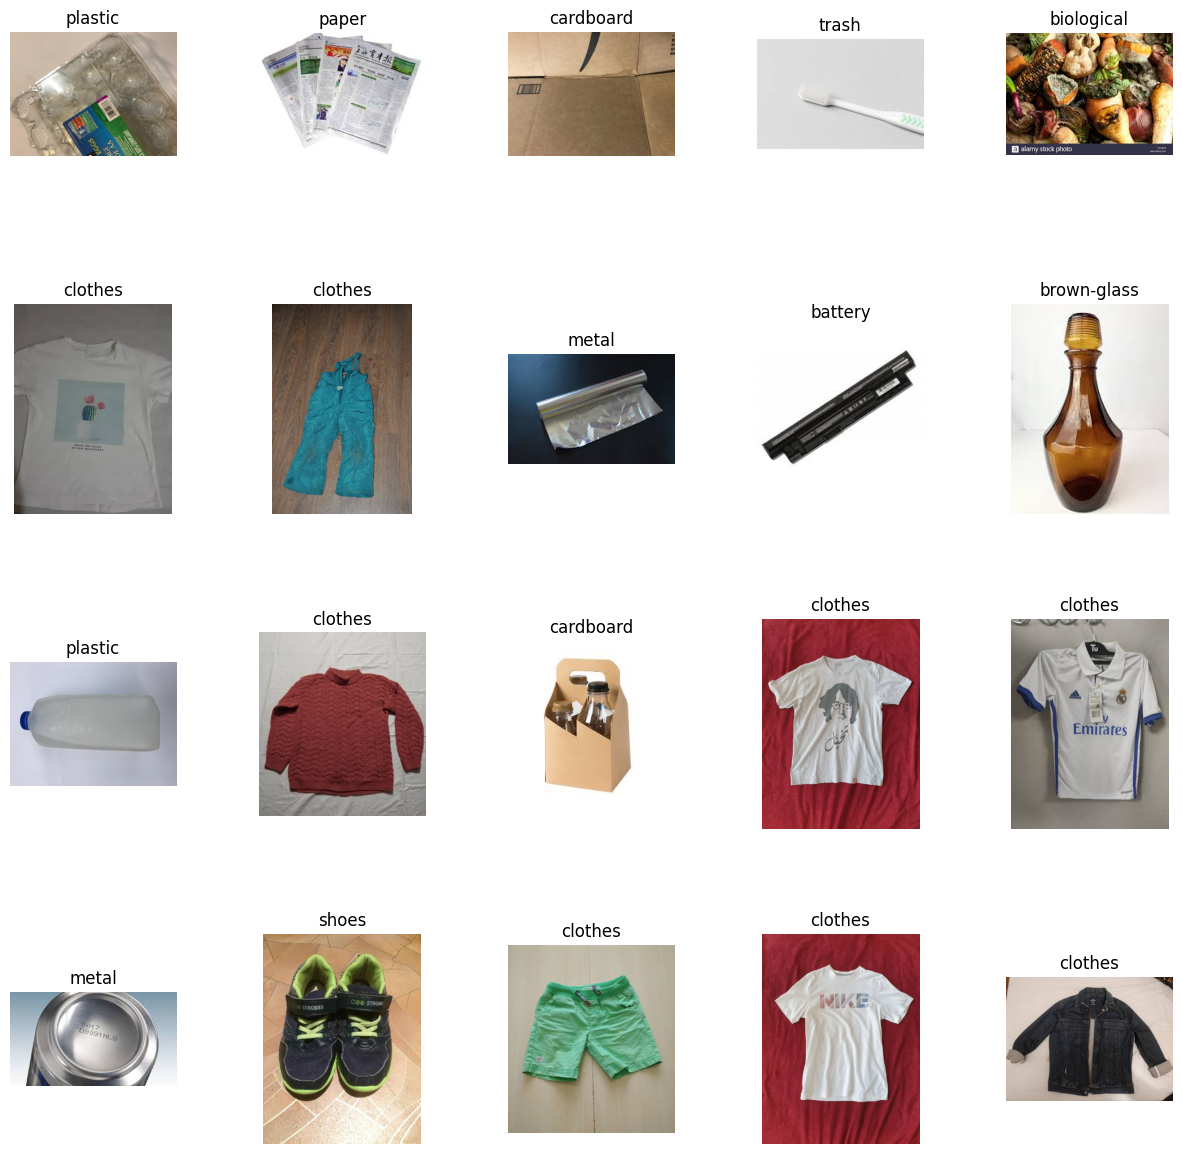

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# Reading the Directory Structure with filtering
image_paths = []
labels = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        # Ignore macOS metadata files and ensure the file is a .jpg
        if not file.startswith("._") and file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Reconstructing the DataFrame with filtered lists
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Sampling and plotting the images (as before)
sample_df = df.sample(n=20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(20):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['label']

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Constructing a DataFrame with Image Data**

In [5]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                image_data.append({
                    'image_id': os.path.splitext(file)[0], # Assuming image_id is the file name without extension
                    'image': img,
                    'image_size': f"{width}x{height}",
                    'category': os.path.basename(root)
                })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)
df.head()


image_id                                              image image_size  \
0  paper745  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
1  paper531  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
2  paper626  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
3  paper836  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
4   paper52  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   

  category  
0    paper  
1    paper  
2    paper  
3    paper  
4    paper

**Resizing images**

In [6]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            img = Image.open(file_path)  # Open the image without the 'with' statement
            width, height = img.size
            image_data.append({
                'image_id': os.path.splitext(file)[0],  # Assuming image_id is the file name without extension
                'image': img,
                'image_path': file_path,  # Storing the file path for potential future use
                'image_size': f"{width}x{height}",
                'category': os.path.basename(root)
            })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)

# 3. Resizing the images
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

df['resized_image'] = df['image'].apply(lambda img: resize_image(img, (128, 128)))

# Display the updated DataFrame
df.head()


image_id                                              image  \
0  paper745  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  paper531  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  paper626  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  paper836  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4   paper52  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                 image_path image_size category  \
0  Project_A/Project_606/paper/paper745.jpg    512x384    paper   
1  Project_A/Project_606/paper/paper531.jpg    512x384    paper   
2  Project_A/Project_606/paper/paper626.jpg    512x384    paper   
3  Project_A/Project_606/paper/paper836.jpg    512x384    paper   
4   Project_A/Project_606/paper/paper52.jpg    512x384    paper   

                                       resized_image  
0  <PIL.Image.Image image mode=RGB size=128x128 a...  
1  <PIL.Image.Image image mode=RGB size=128x128 a...  
2  <PIL.Image.Image image mode=RGB size=128x128 a...  
3  <PIL.Image.Image image mode=RGB size=128x128 a...  
4  <PIL.Image.Image image mode=RGB size=128x128 a...

**Sample Images from Each Category**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

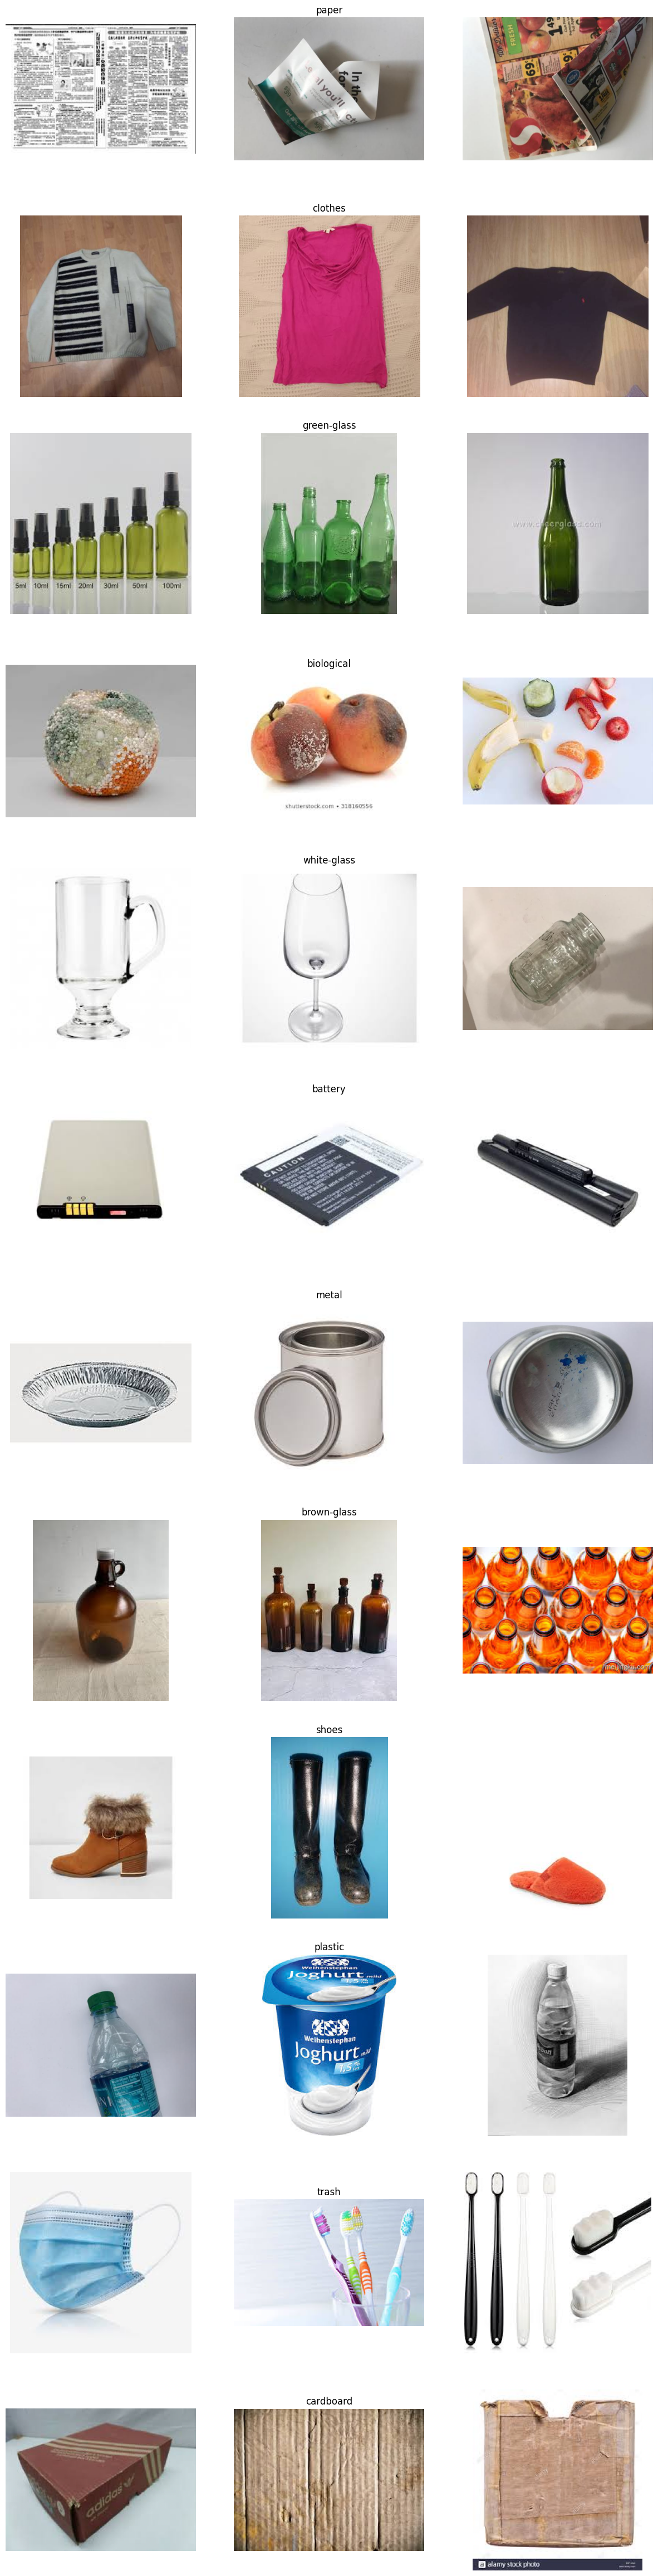

In [9]:
#Sample Images from Each Category:
categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 3, figsize=(15, 5 * len(categories)))

for i, category in enumerate(categories):
    sample_images = df[df['category'] == category]['image'].sample(3)
    for j, img in enumerate(sample_images):
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(category)

plt.show()

# **Exploratory Data Analysis (EDA)**

**Step 1: Import Libraries and Load Data**

In [10]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = df
data

image_id                                              image  \
0          paper745  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1          paper531  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2          paper626  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3          paper836  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4           paper52  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...             ...                                                ...   
15510  cardboard192  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15511  cardboard290  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15512  cardboard592  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15513  cardboard665  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15514  cardboard439  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             image_path image_size   category  \
0              Project_A/Project_606/paper/paper745.jpg    512x384      paper   
1              Project_A/Project_606/paper/paper531.jpg    512x384      paper   
2              Project_A/Project_606/paper/paper626.jpg    512x384      paper   
3              Project_A/Project_606/paper/paper836.jpg    512x384      paper   
4               Project_A/Project_606/paper/paper52.jpg    512x384      paper   
...                                                 ...        ...        ...   
15510  Project_A/Project_606/cardboard/cardboard192.jpg    512x384  cardboard   
15511  Project_A/Project_606/cardboard/cardboard290.jpg    512x384  cardboard   
15512  Project_A/Project_606/cardboard/cardboard592.jpg    225x225  cardboard   
15513  Project_A/Project_606/cardboard/cardboard665.jpg    200x200  cardboard   
15514  Project_A/Project_606/cardboard/cardboard439.jpg    225x225  cardboard   

                                           resized_image  
0      <PIL.Image.Image image mode=RGB size=128x128 a...  
1      <PIL.Image.Image image mode=RGB size=128x128 a...  
2      <PIL.Image.Image image mode=RGB size=128x128 a...  
3      <PIL.Image.Image image mode=RGB size=128x128 a...  
4      <PIL.Image.Image image mode=RGB size=128x128 a...  
...                                                  ...  
15510  <PIL.Image.Image image mode=RGB size=128x128 a...  
15511  <PIL.Image.Image image mode=RGB size=128x128 a...  
15512  <PIL.Image.Image image mode=RGB size=128x128 a...  
15513  <PIL.Image.Image image mode=RGB size=128x128 a...  
15514  <PIL.Image.Image image mode=RGB size=128x128 a...  

[15515 rows x 6 columns]

**Step 2: Data Cleaning**

First, check for missing values and duplicate rows.

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Remove duplicate rows
data = data.drop_duplicates(subset=['image_id'])

image_id         0
image            0
image_path       0
image_size       0
category         0
resized_image    0
dtype: int64


**Step 3: Summary Statistics**

Calculate summary statistics for key variables, primarily focusing on your target variable and selected features.

In [12]:
# Summary statistics for the target variable
target_summary = data['category'].describe()

# Summary statistics for selected features
features_summary = data['image_size'].describe()

print('Target Summary\n',target_summary)
print('\nFeatures Summary\n',features_summary)

Target Summary
 count       15515
unique         12
top       clothes
freq         5325
Name: category, dtype: object

Features Summary
 count       15515
unique        892
top       400x533
freq         2590
Name: image_size, dtype: object


In [13]:
import pandas as pd

# Assuming you have already loaded your DataFrame

# Summary statistics for the 'category' column
category_summary = df['category'].value_counts()
category_percentage = df['category'].value_counts(normalize=True) * 100

# Summary statistics for the 'image_size' column
image_size_summary = df['image_size'].value_counts()

# Display the results
print("Summary Statistics for 'category' Variable:")
print(category_summary)
print("\nPercentage Distribution of 'category' Variable:")
print(category_percentage)
print("\nSummary Statistics for 'image_size' Variable:")
print(image_size_summary)


Summary Statistics for 'category' Variable:
clothes        5325
shoes          1977
paper          1050
biological      985
battery         945
cardboard       891
plastic         865
white-glass     775
metal           769
trash           697
green-glass     629
brown-glass     607
Name: category, dtype: int64

Percentage Distribution of 'category' Variable:
clothes        34.321624
shoes          12.742507
paper           6.767644
biological      6.348695
battery         6.090880
cardboard       5.742830
plastic         5.575250
white-glass     4.995166
metal           4.956494
trash           4.492427
green-glass     4.054141
brown-glass     3.912343
Name: category, dtype: float64

Summary Statistics for 'image_size' Variable:
400x533    2590
512x384    2358
225x225    2004
400x534    1077
275x183     691
           ... 
400x516       1
400x638       1
601x400       1
400x616       1
263x177       1
Name: image_size, Length: 892, dtype: int64


**Step 4: Data Visualization**

Use Plotly Express to create visualizations. For instance, you can create a histogram to visualize the distribution of the target variable and a scatter plot to explore the relationship between image size and the target variable (category).

In [15]:
# Scatter plot of Image Size vs. Target variable
scatter_plot = px.scatter(data, x='image_size', y='category', title='Image Size vs. Garbage Category')

scatter_plot

In [16]:
# Box plot of Image Size Distribution by Garbage Category
box_plot = px.box(data, x='category', y='image_size', title='Image Size Distribution by Garbage Category')
box_plot

In [17]:
# Pie chart of Distribution of Garbage Category
pie_chart = px.pie(data, names='category', title='Distribution of Garbage Categories')
pie_chart

In [18]:
# Violin Plot Of Image Size by Garbage Category
violin_plot = px.violin(data, x='category', y='image_size', title='Violin Plot of Image Size by Garbage Category')
violin_plot

**Step 5: Exploration of Resized Images**

If the 'resized_image' column contains additional image data, you can explore and visualize this data to check if resizing impacts image quality.

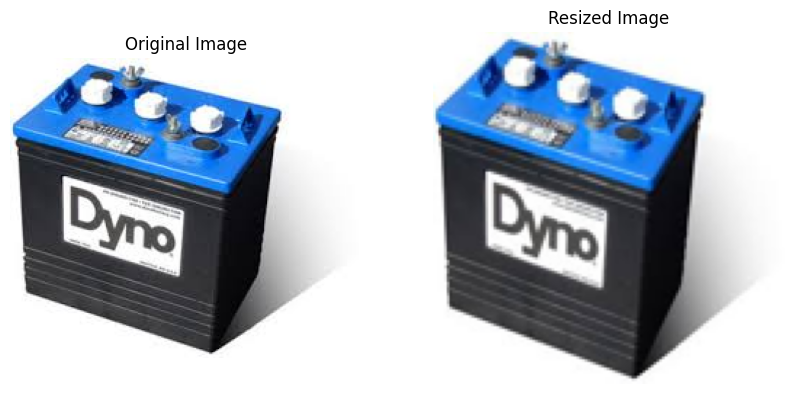

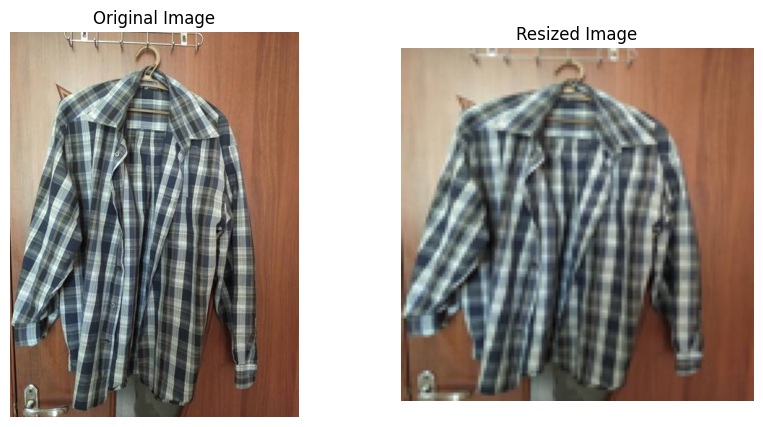

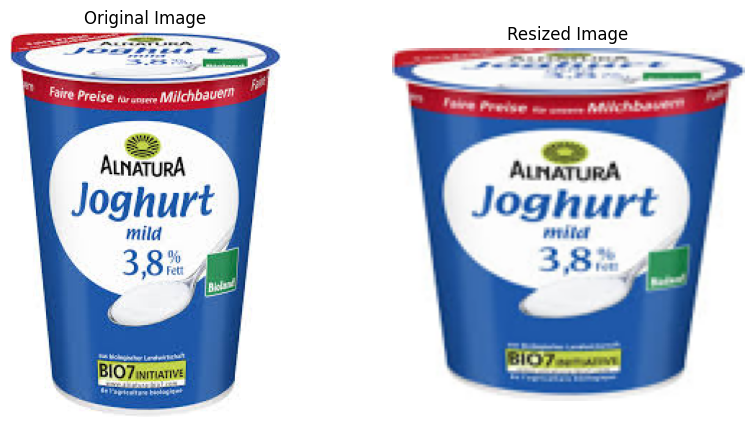

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Sample image IDs for comparison
sample_image_ids = ['battery68', 'clothes123', 'plastic45']

# Function to display original and resized images
def display_original_and_resized_images(image_id):
    # Load the original image
    original_image_path = data.loc[data['image_id'] == image_id, 'image_path'].values[0]
    original_image = Image.open(original_image_path)

    # Get the PIL Image object for the resized image
    resized_image_pil = data.loc[data['image_id'] == image_id, 'resized_image'].values[0]

    # Convert the PIL Image to a NumPy array
    resized_image = np.array(resized_image_pil)

    # Create a subplot for each image
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    # Plot the resized image
    plt.subplot(1, 2, 2)
    plt.title('Resized Image')
    plt.imshow(resized_image)
    plt.axis('off')

    plt.show()

# Display the original and resized images for the sample image IDs
for image_id in sample_image_ids:
    display_original_and_resized_images(image_id)
